#### ライブラリのインポート

In [1]:
import pandas as pd

In [2]:
# Googleドライブのマウント
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### データの作成（Series）

In [ ]:
# 一次元配列（ベクトル）の作成
series = pd.Series(["BMW", "Toyota", "Honada"])
series

0       BMW
1    Toyota
2    Honada
dtype: object

In [ ]:
colors = pd.Series(["Red", "Blue", "White"])
colors

0      Red
1     Blue
2    White
dtype: object

In [ ]:
# 辞書型の値に格納
car_data = pd.Series({"Car make": series, "Color": colors})
car_data

Car make    0       BMW
1    Toyota
2    Honada
dtype: object
Color          0      Red
1     Blue
2    White
dtype: object
dtype: object

####データのインポート（Data Frame）

In [ ]:
car_sales = pd.read_csv("/content/drive/MyDrive/data-analysis/data/car-sales.csv")
car_sales

Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
5  Toyota  Green          99213      4   $4,500.00
6   Honda   Blue          45698      4   $7,500.00
7   Honda   Blue          54738      4   $7,000.00
8  Toyota  White          60000      4   $6,250.00
9  Nissan  White          31600      4   $9,700.00

In [ ]:
# データのエクスポート
# car_sales.to_csv("exported-car-sales.csv", index=False)

#### データの操作

##### 基本操作

In [ ]:
# データ型の確認
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [ ]:
# 列の確認
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [ ]:
# インデックス番号の確認
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
# 数値のみのデータに変換（describe）
car_sales.describe()

Odometer (KM)      Doors
count      10.000000  10.000000
mean    78601.400000   4.000000
std     61983.471735   0.471405
min     11179.000000   3.000000
25%     35836.250000   4.000000
50%     57369.000000   4.000000
75%     96384.500000   4.000000
max    213095.000000   5.000000

In [ ]:
# 基本情報の確認
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
# 平均
car_prices = pd.Series([3000,1500,111250])
car_prices.mean()

38583.333333333336

In [ ]:
# 合計
car_prices.sum()

115750

In [ ]:
# 特定の列を抽出 -> 合計
car_sales["Doors"].sum()

40

In [ ]:
# データの長さ（行）の確認
len(car_sales)

10

In [ ]:
# 先頭5行
car_sales.head()

Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00

In [ ]:
# 末尾5行
car_sales.tail()

Make Colour  Odometer (KM)  Doors      Price
5  Toyota  Green          99213      4  $4,500.00
6   Honda   Blue          45698      4  $7,500.00
7   Honda   Blue          54738      4  $7,000.00
8  Toyota  White          60000      4  $6,250.00
9  Nissan  White          31600      4  $9,700.00

##### データ抽出

In [ ]:
# .locと.iloc
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"],
                    index=[0,3,9,8,3])
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [ ]:
# ラベルベースのアクセス
animals.loc[3]

3      dog
3    snake
dtype: object

In [ ]:
# インデックス番号ベースのアクセス
animals.iloc[3]

'panda'

In [ ]:
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [ ]:
# 列の抽出①（配列であるため）
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [ ]:
# 列の抽出②（dfであるため）
car_sales.Colour

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

In [ ]:
# []の中に[]がある場合条件を表す（blueindex）
car_sales[car_sales["Make"] == "Toyota"]

Make Colour  Odometer (KM)  Doors      Price
0  Toyota  White         150043      4  $4,000.00
2  Toyota   Blue          32549      3  $7,000.00
5  Toyota  Green          99213      4  $4,500.00
8  Toyota  White          60000      4  $6,250.00

In [ ]:
car_sales[car_sales["Odometer (KM)"] > 100000]

Make Colour  Odometer (KM)  Doors      Price
0  Toyota  White         150043      4  $4,000.00
4  Nissan  White         213095      4  $3,500.00

##### 集計

In [ ]:
# クロス集計表
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors   3  4  5
Make           
BMW     0  0  1
Honda   0  3  0
Nissan  0  2  0
Toyota  1  3  0

In [ ]:
# グループごとに集計　※グループ化（数値のみ）
car_sales.groupby("Make").mean(numeric_only=True)

Odometer (KM)  Doors
Make                        
BMW      11179.000000   5.00
Honda    62778.333333   4.00
Nissan  122347.500000   4.00
Toyota   85451.250000   3.75

##### 可視化（折れ線グラフ・ヒストグラム）

<Axes: >

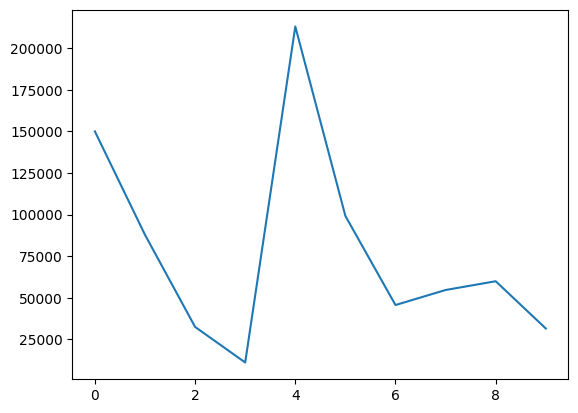

In [ ]:
# 折れ線グラフ
car_sales["Odometer (KM)"].plot()

<Axes: >

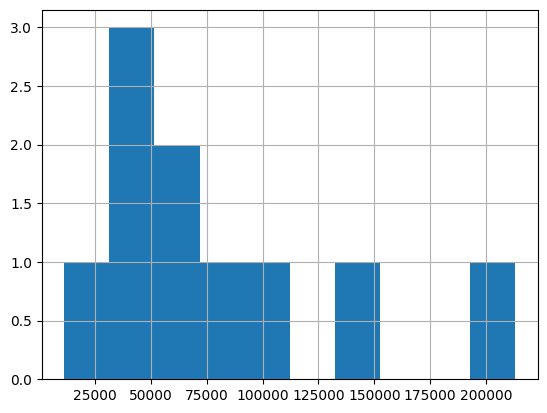

In [ ]:
# ヒストグラム
car_sales["Odometer (KM)"].hist()

In [ ]:
# データ型の確認
car_sales["Price"].dtype

dtype('O')

In [ ]:
# オブジェクト型から数値型に変更（Priceの "$" の部分を変更）
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]', '', regex=True).astype(int)

In [ ]:
# Price列が変更されていることを確認
car_sales

Make Colour  Odometer (KM)  Doors    Price
0  Toyota  White         150043      4   400000
1   Honda    Red          87899      4   500000
2  Toyota   Blue          32549      3   700000
3     BMW  Black          11179      5  2200000
4  Nissan  White         213095      4   350000
5  Toyota  Green          99213      4   450000
6   Honda   Blue          45698      4   750000
7   Honda   Blue          54738      4   700000
8  Toyota  White          60000      4   625000
9  Nissan  White          31600      4   970000

<Axes: >

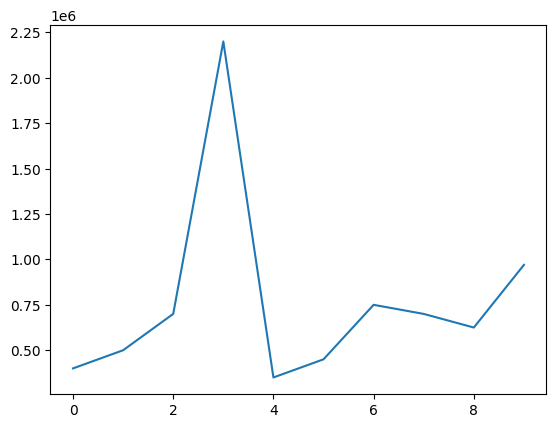

In [ ]:
# 折れ線グラフ
car_sales["Price"].plot()

##### 欠損値の処理

In [ ]:
# 欠損がある場合の処理
car_sales_missing = pd.read_csv("/content/drive/MyDrive/data-analysis/data/car-sales-missing-data.csv")
car_sales_missing

Make Colour  Odometer  Doors    Price
0  Toyota  White  150043.0    4.0   $4,000
1   Honda    Red   87899.0    4.0   $5,000
2  Toyota   Blue       NaN    3.0   $7,000
3     BMW  Black   11179.0    5.0  $22,000
4  Nissan  White  213095.0    4.0   $3,500
5  Toyota  Green       NaN    4.0   $4,500
6   Honda    NaN       NaN    4.0   $7,500
7   Honda   Blue       NaN    4.0      NaN
8  Toyota  White   60000.0    NaN      NaN
9     NaN  White   31600.0    4.0   $9,700

In [4]:
# 欠損値の補填（fillna）
car_sales_missing['Odometer'] = car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean())
car_sales_missing

Make Colour       Odometer  Doors    Price
0  Toyota  White  150043.000000    4.0   $4,000
1   Honda    Red   87899.000000    4.0   $5,000
2  Toyota   Blue   92302.666667    3.0   $7,000
3     BMW  Black   11179.000000    5.0  $22,000
4  Nissan  White  213095.000000    4.0   $3,500
5  Toyota  Green   92302.666667    4.0   $4,500
6   Honda    NaN   92302.666667    4.0   $7,500
7   Honda   Blue   92302.666667    4.0      NaN
8  Toyota  White   60000.000000    NaN      NaN
9     NaN  White   31600.000000    4.0   $9,700

In [6]:
# 欠損値の削除（dropna）
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

Make Colour       Odometer  Doors    Price
0  Toyota  White  150043.000000    4.0   $4,000
1   Honda    Red   87899.000000    4.0   $5,000
2  Toyota   Blue   92302.666667    3.0   $7,000
3     BMW  Black   11179.000000    5.0  $22,000
4  Nissan  White  213095.000000    4.0   $3,500
5  Toyota  Green   92302.666667    4.0   $4,500

In [ ]:
# 欠損値処理後のデータをcsvに保存
car_sales_missing_dropped.to_csv("car-sales-missing-dropped.csv")

##### 列の追加・削除

In [9]:
# 列の追加①
seats_culmn = pd.Series([5,5,5,5,5])
car_sales["Seats"] = seats_culmn
car_sales

Make Colour  Odometer (KM)  Doors       Price  Seats
0  Toyota  White         150043      4   $4,000.00    5.0
1   Honda    Red          87899      4   $5,000.00    5.0
2  Toyota   Blue          32549      3   $7,000.00    5.0
3     BMW  Black          11179      5  $22,000.00    5.0
4  Nissan  White         213095      4   $3,500.00    5.0
5  Toyota  Green          99213      4   $4,500.00    NaN
6   Honda   Blue          45698      4   $7,500.00    NaN
7   Honda   Blue          54738      4   $7,000.00    NaN
8  Toyota  White          60000      4   $6,250.00    NaN
9  Nissan  White          31600      4   $9,700.00    NaN

In [10]:
# 欠損値の補填
car_sales["Seats"] = car_sales["Seats"].fillna(5)
car_sales

Make Colour  Odometer (KM)  Doors       Price  Seats
0  Toyota  White         150043      4   $4,000.00    5.0
1   Honda    Red          87899      4   $5,000.00    5.0
2  Toyota   Blue          32549      3   $7,000.00    5.0
3     BMW  Black          11179      5  $22,000.00    5.0
4  Nissan  White         213095      4   $3,500.00    5.0
5  Toyota  Green          99213      4   $4,500.00    5.0
6   Honda   Blue          45698      4   $7,500.00    5.0
7   Honda   Blue          54738      4   $7,000.00    5.0
8  Toyota  White          60000      4   $6,250.00    5.0
9  Nissan  White          31600      4   $9,700.00    5.0

In [ ]:
# 列の追加②
fuel_economy = [7.5,9.2,5.0,9.6,8.7,4.7,7.6,8.7,3.0,4.5]
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM
0  Toyota  White         150043      4   400000    5.0             7.5
1   Honda    Red          87899      4   500000    5.0             9.2
2  Toyota   Blue          32549      3   700000    5.0             5.0
3     BMW  Black          11179      5  2200000    5.0             9.6
4  Nissan  White         213095      4   350000    5.0             8.7
5  Toyota  Green          99213      4   450000    5.0             4.7
6   Honda   Blue          45698      4   750000    5.0             7.6
7   Honda   Blue          54738      4   700000    5.0             8.7
8  Toyota  White          60000      4   625000    5.0             3.0
9  Nissan  White          31600      4   970000    5.0             4.5

In [ ]:
# 列の追加③
car_sales["Total Fuel Used"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel per 100KM"]
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  White         150043      4   400000    5.0             7.5   
1   Honda    Red          87899      4   500000    5.0             9.2   
2  Toyota   Blue          32549      3   700000    5.0             5.0   
3     BMW  Black          11179      5  2200000    5.0             9.6   
4  Nissan  White         213095      4   350000    5.0             8.7   
5  Toyota  Green          99213      4   450000    5.0             4.7   
6   Honda   Blue          45698      4   750000    5.0             7.6   
7   Honda   Blue          54738      4   700000    5.0             8.7   
8  Toyota  White          60000      4   625000    5.0             3.0   
9  Nissan  White          31600      4   970000    5.0             4.5   

   Total Fuel Used  
0        11253.225  
1         8086.708  
2         1627.450  
3         1073.184  
4        18539.265  
5         4663.011  
6         3473.048  
7         4762.206  
8         1800.000  
9         1422.000

In [ ]:
# 列の追加④（一つの値から列を作る）
car_sales["Number of wheels"] = 4
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  White         150043      4   400000    5.0             7.5   
1   Honda    Red          87899      4   500000    5.0             9.2   
2  Toyota   Blue          32549      3   700000    5.0             5.0   
3     BMW  Black          11179      5  2200000    5.0             9.6   
4  Nissan  White         213095      4   350000    5.0             8.7   
5  Toyota  Green          99213      4   450000    5.0             4.7   
6   Honda   Blue          45698      4   750000    5.0             7.6   
7   Honda   Blue          54738      4   700000    5.0             8.7   
8  Toyota  White          60000      4   625000    5.0             3.0   
9  Nissan  White          31600      4   970000    5.0             4.5   

   Total Fuel Used  Number of wheels  
0        11253.225                 4  
1         8086.708                 4  
2         1627.450                 4  
3         1073.184                 4  
4        18539.265                 4  
5         4663.011                 4  
6         3473.048                 4  
7         4762.206                 4  
8         1800.000                 4  
9         1422.000                 4

In [ ]:
car_sales["Passed Road Safety"] = True
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  White         150043      4   400000    5.0             7.5   
1   Honda    Red          87899      4   500000    5.0             9.2   
2  Toyota   Blue          32549      3   700000    5.0             5.0   
3     BMW  Black          11179      5  2200000    5.0             9.6   
4  Nissan  White         213095      4   350000    5.0             8.7   
5  Toyota  Green          99213      4   450000    5.0             4.7   
6   Honda   Blue          45698      4   750000    5.0             7.6   
7   Honda   Blue          54738      4   700000    5.0             8.7   
8  Toyota  White          60000      4   625000    5.0             3.0   
9  Nissan  White          31600      4   970000    5.0             4.5   

   Total Fuel Used  Number of wheels  Passed Road Safety  
0        11253.225                 4                True  
1         8086.708                 4                True  
2         1627.450                 4                True  
3         1073.184                 4                True  
4        18539.265                 4                True  
5         4663.011                 4                True  
6         3473.048                 4                True  
7         4762.206                 4                True  
8         1800.000                 4                True  
9         1422.000                 4                True

In [ ]:
# 列の削除
car_sales.drop("Total Fuel Used", axis=1, inplace=True)
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  White         150043      4   400000    5.0             7.5   
1   Honda    Red          87899      4   500000    5.0             9.2   
2  Toyota   Blue          32549      3   700000    5.0             5.0   
3     BMW  Black          11179      5  2200000    5.0             9.6   
4  Nissan  White         213095      4   350000    5.0             8.7   
5  Toyota  Green          99213      4   450000    5.0             4.7   
6   Honda   Blue          45698      4   750000    5.0             7.6   
7   Honda   Blue          54738      4   700000    5.0             8.7   
8  Toyota  White          60000      4   625000    5.0             3.0   
9  Nissan  White          31600      4   970000    5.0             4.5   

   Number of wheels  Passed Road Safety  
0                 4                True  
1                 4                True  
2                 4                True  
3                 4                True  
4                 4                True  
5                 4                True  
6                 4                True  
7                 4                True  
8                 4                True  
9                 4                True

##### 行のシャッフル

In [ ]:
# 行のシャッフル（sample）　※機械学習用のデータは汎用的である必要がある
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
5  Toyota  Green          99213      4   450000    5.0             4.7   
0  Toyota  White         150043      4   400000    5.0             7.5   
6   Honda   Blue          45698      4   750000    5.0             7.6   
2  Toyota   Blue          32549      3   700000    5.0             5.0   
4  Nissan  White         213095      4   350000    5.0             8.7   
1   Honda    Red          87899      4   500000    5.0             9.2   
8  Toyota  White          60000      4   625000    5.0             3.0   
7   Honda   Blue          54738      4   700000    5.0             8.7   
9  Nissan  White          31600      4   970000    5.0             4.5   
3     BMW  Black          11179      5  2200000    5.0             9.6   

   Number of wheels  Passed Road Safety  
5                 4                True  
0                 4                True  
6                 4                True  
2                 4                True  
4                 4                True  
1                 4                True  
8                 4                True  
7                 4                True  
9                 4                True  
3                 4                True

In [ ]:
# 余計なインデックス番号列を削除
car_sales_shuffled.reset_index(drop=True, inplace=True)
car_sales_shuffled

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  Green          99213      4   450000    5.0             4.7   
1  Toyota  White         150043      4   400000    5.0             7.5   
2   Honda   Blue          45698      4   750000    5.0             7.6   
3  Toyota   Blue          32549      3   700000    5.0             5.0   
4  Nissan  White         213095      4   350000    5.0             8.7   
5   Honda    Red          87899      4   500000    5.0             9.2   
6  Toyota  White          60000      4   625000    5.0             3.0   
7   Honda   Blue          54738      4   700000    5.0             8.7   
8  Nissan  White          31600      4   970000    5.0             4.5   
9     BMW  Black          11179      5  2200000    5.0             9.6   

   Number of wheels  Passed Road Safety  
0                 4                True  
1                 4                True  
2                 4                True  
3                 4                True  
4                 4                True  
5                 4                True  
6                 4                True  
7                 4                True  
8                 4                True  
9                 4                True

In [ ]:
# 全データの20%でシャッフル
car_sales_shuffled.sample(frac=0.2)

Make Colour  Odometer (KM)  Doors   Price  Seats  Fuel per 100KM  \
4  Nissan  White         213095      4  350000    5.0             8.7   
5   Honda    Red          87899      4  500000    5.0             9.2   

   Number of wheels  Passed Road Safety  
4                 4                True  
5                 4                True

In [ ]:
# インデックス番号順にリセット
car_sales_shuffled.reset_index()

index    Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0      0  Toyota  Green          99213      4   450000    5.0             4.7   
1      1  Toyota  White         150043      4   400000    5.0             7.5   
2      2   Honda   Blue          45698      4   750000    5.0             7.6   
3      3  Toyota   Blue          32549      3   700000    5.0             5.0   
4      4  Nissan  White         213095      4   350000    5.0             8.7   
5      5   Honda    Red          87899      4   500000    5.0             9.2   
6      6  Toyota  White          60000      4   625000    5.0             3.0   
7      7   Honda   Blue          54738      4   700000    5.0             8.7   
8      8  Nissan  White          31600      4   970000    5.0             4.5   
9      9     BMW  Black          11179      5  2200000    5.0             9.6   

   Number of wheels  Passed Road Safety  
0                 4                True  
1                 4                True  
2                 4                True  
3                 4                True  
4                 4                True  
5                 4                True  
6                 4                True  
7                 4                True  
8                 4                True  
9                 4                True

##### 列の一括操作

In [ ]:
# Odometer列をマイルに変換　※列（行）の一括操作
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].apply(lambda x: x / 1.6)
car_sales

Make Colour  Odometer (KM)  Doors    Price  Seats  Fuel per 100KM  \
0  Toyota  White      93776.875      4   400000    5.0             7.5   
1   Honda    Red      54936.875      4   500000    5.0             9.2   
2  Toyota   Blue      20343.125      3   700000    5.0             5.0   
3     BMW  Black       6986.875      5  2200000    5.0             9.6   
4  Nissan  White     133184.375      4   350000    5.0             8.7   
5  Toyota  Green      62008.125      4   450000    5.0             4.7   
6   Honda   Blue      28561.250      4   750000    5.0             7.6   
7   Honda   Blue      34211.250      4   700000    5.0             8.7   
8  Toyota  White      37500.000      4   625000    5.0             3.0   
9  Nissan  White      19750.000      4   970000    5.0             4.5   

   Number of wheels  Passed Road Safety  
0                 4                True  
1                 4                True  
2                 4                True  
3                 4                True  
4                 4                True  
5                 4                True  
6                 4                True  
7                 4                True  
8                 4                True  
9                 4                True